In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
df=pd.read_csv("heart (1).csv")
print("Dataset shape:",df.shape)
df.head()

Dataset shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print("\nMissing values:\n",df.isnull().sum())


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
X=df.drop("target", axis=1)
y=df["target"]

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred_dt = dtree.predict(X_test)
print("\nDecision Tree Classification Report:\n",classification_report(y_test,y_pred_dt))
print("Accuracy:", accuracy_score(y_test,y_pred_dt))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy: 0.9853658536585366


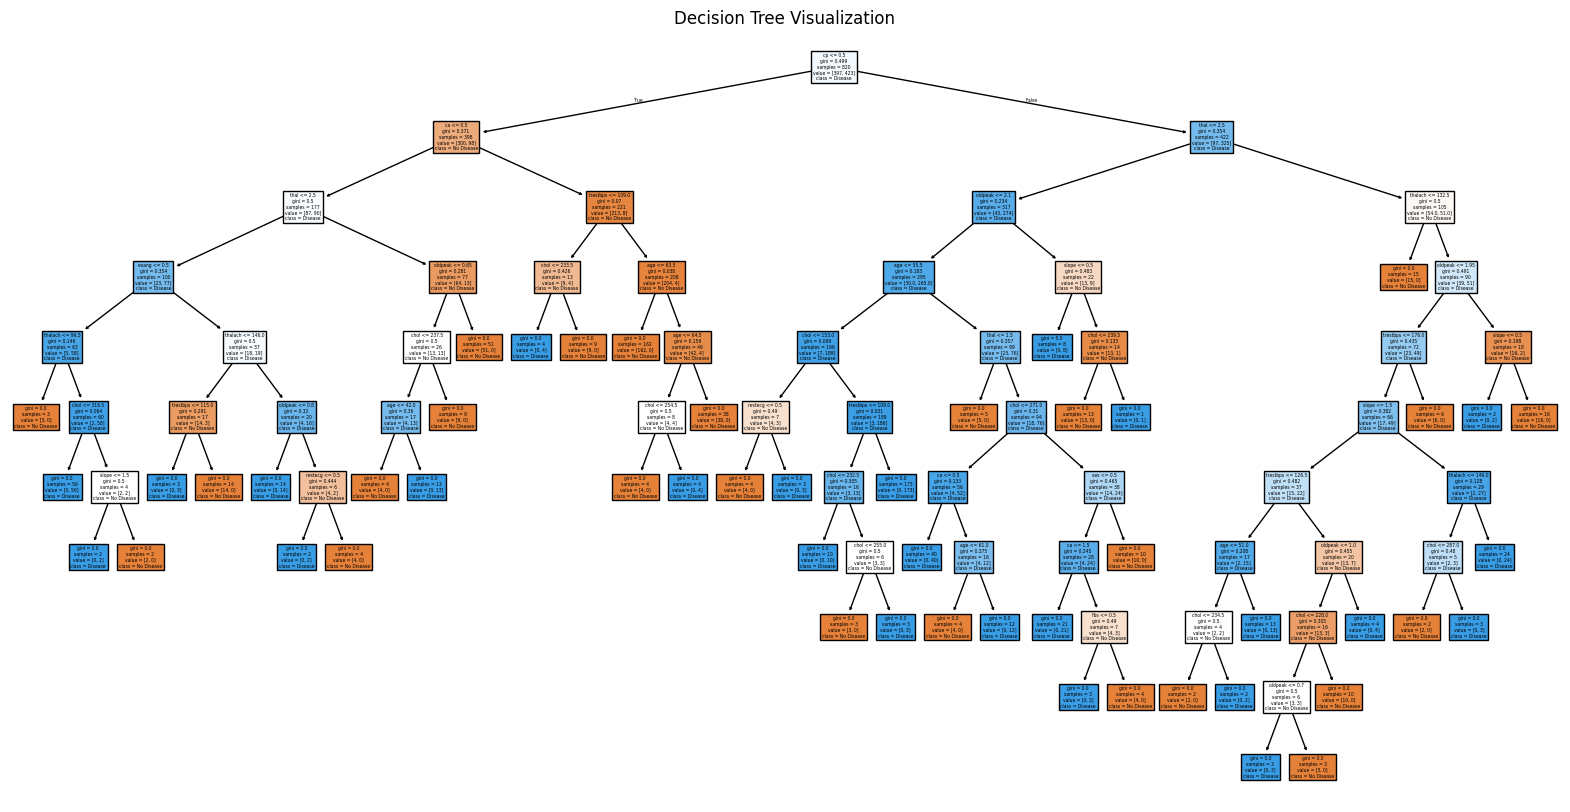

In [9]:
plt.figure(figsize=(20,10))
plot_tree(dtree,feature_names=X.columns,class_names=["No Disease", "Disease"],filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [10]:
depths=range(1,20)
scores=[]
for d in depths:
    model=DecisionTreeClassifier(max_depth=d,random_state=42)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

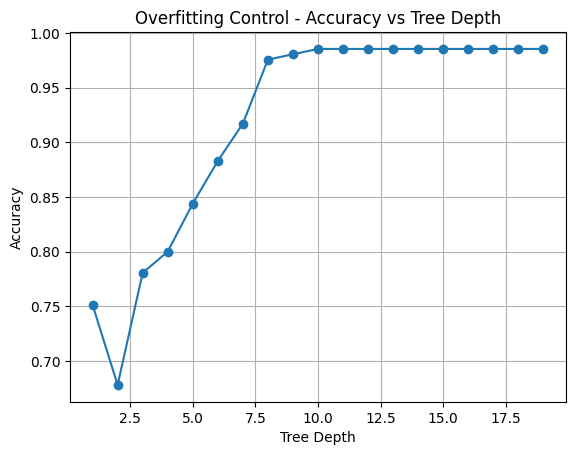

In [12]:
plt.plot(depths, scores,marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Control - Accuracy vs Tree Depth")
plt.grid(True)
plt.show()

Random Forest Classifier

In [17]:
rforest = RandomForestClassifier(n_estimators=150,random_state=42)
rforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [18]:

y_pred_rf=rforest.predict(X_test)
print("\nRandom Forest Classification Report:\n",classification_report(y_test,y_pred_rf))
print("Accuracy:",accuracy_score(y_test,y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy: 0.9853658536585366


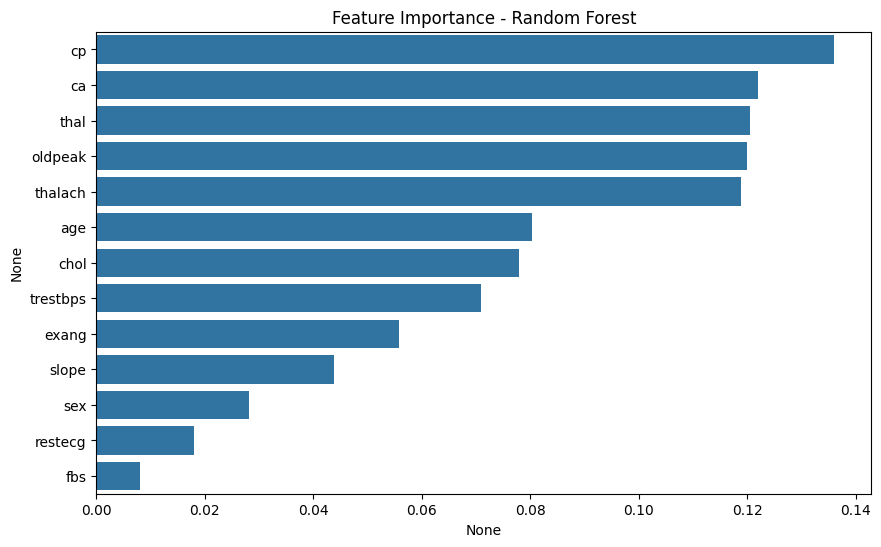

In [19]:
importances=rforest.feature_importances_
feat_importance=pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance,y=feat_importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()

In [20]:
cv_scores_dt=cross_val_score(dtree,X,y,cv=5)
cv_scores_rf=cross_val_score(rforest,X,y,cv=5)
print("\nDecision Tree CV Accuracy (5-fold):",np.mean(cv_scores_dt))
print("Random Forest CV Accuracy (5-fold):",np.mean(cv_scores_rf))


Decision Tree CV Accuracy (5-fold): 1.0
Random Forest CV Accuracy (5-fold): 0.9970731707317073
